In [8]:
import pandas as pd
import statistics
import plotly.express as px

#Plotting the graph
df = pd.read_csv("savings_data.csv")
fig = px.scatter(df, y="quant_saved", color="highschool_completed")
fig.show()

In [9]:
import csv

with open('savings_data.csv', newline="") as f:
  reader = csv.reader(f)
  savings_data = list(reader)

savings_data.pop(0)

#Finding total number of people and number of people who were reminded
total_entries = len(savings_data)
total_people_given_reminder = 0
for data in savings_data:
  if int(data[3]) == 1:
    total_people_given_reminder += 1

import plotly.graph_objects as go

fig = go.Figure(go.Bar(x=["Reminded", "Not Reminded"], y=[total_people_given_reminder, (total_entries - total_people_given_reminder)]))

fig.show()

In [10]:
#Mean, median and mode of savings
all_savings = []
for data in savings_data:
  all_savings.append(float(data[0]))

print(f"Mean of savings - {statistics.mean(all_savings)}")
print(f"Median of savings - {statistics.median(all_savings)}")
print(f"Mode of savings - {statistics.mode(all_savings)}")


Mean of savings - 85.32780331328739
Median of savings - 39.2724
Mode of savings - 0.0


In [11]:
#Mean, median and mode of savings
reminded_savings = []
not_reminded_savings = []
for data in savings_data:
  if int(data[3]) == 1:
    reminded_savings.append(float(data[0]))
  else:
    not_reminded_savings.append(float(data[0]))

print("Results for people who were reminded to save")
print(f"Mean of savings - {statistics.mean(reminded_savings)}")
print(f"Median of savings - {statistics.median(reminded_savings)}")
print(f"Mode of savings - {statistics.mode(reminded_savings)}")
print("\n\n")
print("Results for people who were not reminded to save")
print(f"Mean of savings - {statistics.mean(not_reminded_savings)}")
print(f"Median of savings - {statistics.median(not_reminded_savings)}")
print(f"Mode of savings - {statistics.mode(not_reminded_savings)}")

Results for people who were reminded to save
Mean of savings - 78.61157672384391
Median of savings - 39.2724
Mode of savings - 2.284



Results for people who were not reminded to save
Mean of savings - 87.22929365730847
Median of savings - 39.2724
Mode of savings - 0.0


In [12]:
#Standard Deviation
print(f"Standard deviation of all the data -> {statistics.stdev(all_savings)}")
print(f"Standard deviation of people who were reminded -> {statistics.stdev(reminded_savings)}")
print(f"Standard deviation of people who were not reminded -> {statistics.stdev(not_reminded_savings)}")

Standard deviation of all the data -> 196.75453011909315
Standard deviation of people who were reminded -> 164.58072141099734
Standard deviation of people who were not reminded -> 204.91519933877308


In [13]:
import numpy as np

wealthy = []
savings = []
for data in savings_data:
  if float(data[1]) != 0:
    wealthy.append(float(data[3]))
    savings.append(float(data[0]))

correlation = np.corrcoef(wealthy, savings)
print(f"Correlation between the gender of the person and their wealth is - {correlation[0,1]}")

Correlation between the gender of the person and their wealth is - -0.020523469937668164


In [14]:
import plotly.figure_factory as ff

fig = ff.create_distplot([df["quant_saved"].tolist()], ["Savings"], show_hist=False)
fig.show()

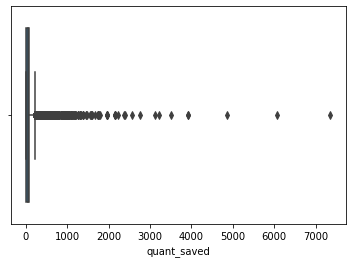

In [15]:
import seaborn as sns

sns.boxplot(data=df, x=df["quant_saved"])

In [16]:
q1 = df["quant_saved"].quantile(0.25)
q3 = df["quant_saved"].quantile(0.75)
iqr = q3-q1

print(f"Q1 - {q1}")
print(f"Q3 - {q3}")
print(f"IQR - {iqr}")

lower_whisker = q1 - 1.5*iqr
upper_whisker = q3 + 1.5*iqr

print(f"Lower Whisker - {lower_whisker}")
print(f"Upper Whisker - {upper_whisker}")

#Creating a new DataFrame
new_df = df[df["quant_saved"] < upper_whisker]

Q1 - 2.2840000000000003
Q3 - 86.514
IQR - 84.22999999999999
Lower Whisker - -124.06099999999998
Upper Whisker - 212.85899999999998


In [17]:
#Mean, median and mode of savings
all_savings = new_df["quant_saved"].tolist()

print(f"Mean of savings - {statistics.mean(all_savings)}")
print(f"Median of savings - {statistics.median(all_savings)}")
print(f"Mode of savings - {statistics.mode(all_savings)}")
print(f"Standard deviation in savings - {statistics.stdev(all_savings)}")

fig = ff.create_distplot([new_df["quant_saved"].tolist()], ["Savings"], show_hist=False)
fig.show()

Mean of savings - 46.200519389818794
Median of savings - 36.0475
Mode of savings - 0.0
Standard deviation in savings - 50.866871917288634


In [18]:
#Collecting 1000 samples of 100 data points each, saving their averages in a list
import random

sampling_mean_list = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(all_savings))
  sampling_mean_list.append(statistics.mean(temp_list))

mean_sampling = statistics.mean(sampling_mean_list)

fig = ff.create_distplot([sampling_mean_list], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN"))
fig.show()

In [19]:
print(f"Standard deviation of the sampling data - {statistics.stdev(sampling_mean_list)}")

Standard deviation of the sampling data - 4.994601845378528


In [20]:
print(f"Mean of Population - {statistics.mean(all_savings)}")
print(f"Mean of Sampling Distribution - {mean_sampling}")

Mean of Population - 46.200519389818794
Mean of Sampling Distribution - 46.372196344202756


In [24]:
#temp_df will have the rows where age is not 0
temp_df = new_df[new_df.wealthy != 0]

wealthy = temp_df["wealthy"].tolist()
quant_saved = temp_df["quant_saved"].tolist()

correlation = np.corrcoef(wealthy, quant_saved)

print("There is no correlation between the wealth of the person and their savings")

There is no correlation between the wealth of the person and their savings


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning:

invalid value encountered in true_divide

